<a href="https://colab.research.google.com/github/jonatansg/CEIABD/blob/main/Actividad_3_5_%E2%80%93_Clasificacion_de_vinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autor:** Jonatan Santana González

El objeto de esta actividad es poner en práctica los conocimientos adquiridos, para ello vamos a utilizar el siguiente dataset que contiene una serie de características físico-químicas que determina la calidad del vino en una escala de valores del 1 al 10.

El enlace donde se encuentran los dataset es el siguiente:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

## 1. Importación de los datasets (utilizar el dataset winequality-red.csv)

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Binarizer, KBinsDiscretizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
# URL del dataset (winequality-red.csv)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Cargamos el dataset especificando el delimitador ';'
df = pd.read_csv(url, sep=";")

# Mostramos las primeras filas para verificar la carga correcta
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2. Mostrar la matriz de correlación de variables.

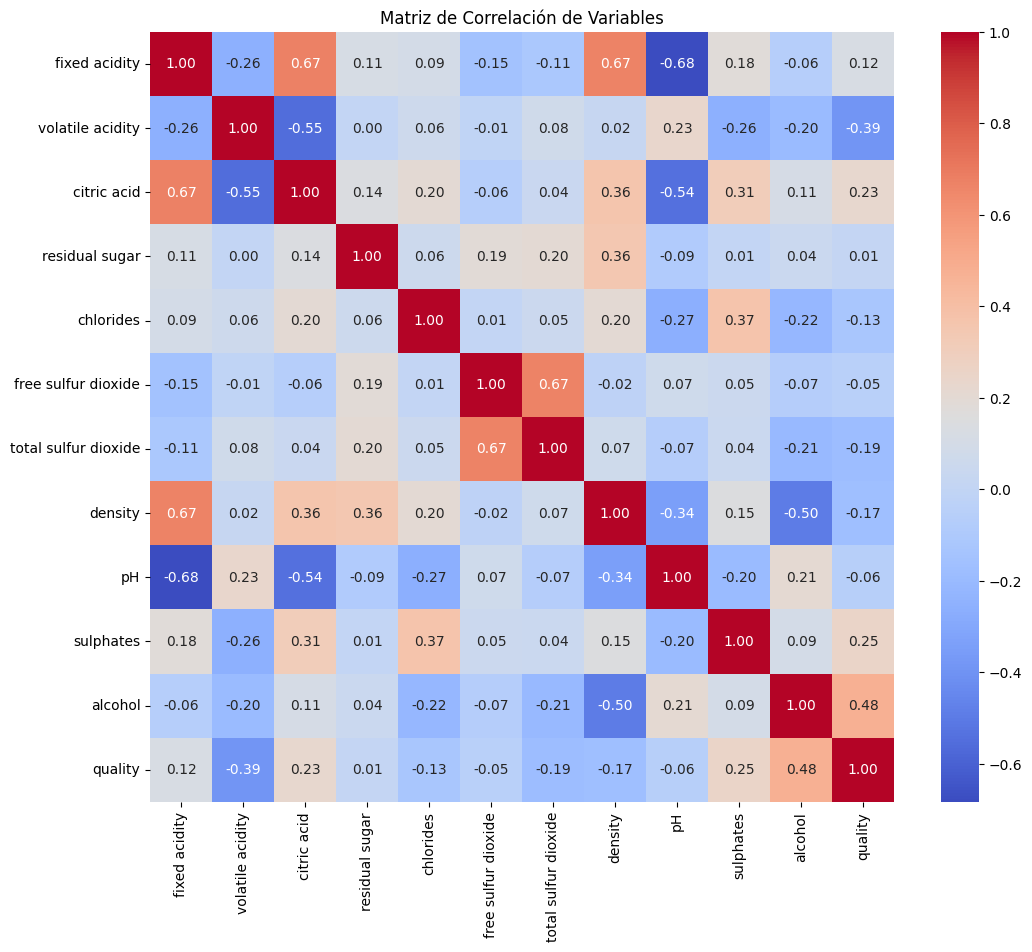

In [3]:
# Calculamos la matriz de correlación
corr_matrix = df.corr()

# Configuramos el tamaño de la figura
plt.figure(figsize=(12,10))

# Creamos el mapa de calor de la matriz de correlación
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

# Título del gráfico
plt.title("Matriz de Correlación de Variables")
plt.show()

Al analizar la matriz de correlación, observé que el contenido de alcohol es la variable que tiene la mayor relación positiva con la calidad del vino, lo que indica que los vinos con un mayor grado alcohólico suelen recibir mejores calificaciones. También noté que el pH y la densidad muestran correlaciones negativas significativas con algunas variables, lo que sugiere que influyen en la estructura química del vino y, posiblemente, en su calidad. El ácido cítrico y los sulfitos presentan una relación moderada con la calidad, lo que indica que afectan en cierta medida, pero no son los factores determinantes. Por otro lado, la acidez volátil tiene una correlación negativa con la calidad, lo que sugiere que los vinos con mayor acidez volátil tienden a obtener puntuaciones más bajas.

Para la selección de características en los modelos de clasificación, decidí enfocarme en alcohol, ácido cítrico y acidez volátil, ya que son las variables que parecen tener mayor impacto en la calidad del vino. Además, considero la posibilidad de eliminar características con menor relevancia y evaluar si esto mejora el rendimiento del modelo.

## 3. Aplicar cualquier otra técnica de selección de características que consideres adecuados y justificar tu propuesta.

In [4]:
# Definimos las variables predictoras (todas excepto 'quality') y la variable objetivo
X = df.drop("quality", axis=1)
y = df["quality"]

# Aplicamos SelectKBest para seleccionar las 5 mejores características
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X, y)

# Obtenemos las puntuaciones de cada característica
scores = selector.scores_

# Creamos un DataFrame para visualizar de forma ordenada las características y sus puntuaciones
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': scores
}).sort_values(by='Score', ascending=False)

print("Puntuaciones de las características:")
print(feature_scores)

# Identificamos las 5 mejores características seleccionadas
selected_features = feature_scores.head(5)['Feature'].tolist()
print("\nLas 5 características seleccionadas son:")
print(selected_features)

Puntuaciones de las características:
                 Feature       Score
10               alcohol  468.267011
1       volatile acidity  287.444450
9              sulphates  107.740433
2            citric acid   86.257726
6   total sulfur dioxide   56.657818
7                density   50.405223
4              chlorides   26.985608
0          fixed acidity   24.960038
8                     pH    5.340462
5    free sulfur dioxide    4.108502
3         residual sugar    0.301184

Las 5 características seleccionadas son:
['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'total sulfur dioxide']


Para la selección de características, decidí utilizar el método **SelectKBest** con la función de puntuación **f_regression**, que mide la relación entre cada variable independiente y la variable objetivo (quality). Este método permite seleccionar las características más relevantes basándose en su impacto en la predicción de la calidad del vino.

Tras aplicar esta técnica, observé que **alcohol, acidez volátil, sulfatos, ácido cítrico y dióxido de azufre total** fueron las cinco características con las puntuaciones más altas. Esto confirma que el contenido de alcohol es la variable más influyente en la calidad del vino, seguido por la acidez volátil, que tiene una fuerte correlación negativa con la calidad. Los sulfatos y el ácido cítrico también resultaron ser factores importantes, lo que sugiere que contribuyen significativamente a la estructura y sabor del vino. El dióxido de azufre total, aunque con una puntuación más baja que las anteriores, aún tiene un impacto relevante en la clasificación de la calidad.

Justifico esta elección porque estas cinco características tienen la mayor capacidad predictiva según el análisis estadístico, lo que permite reducir la dimensionalidad del modelo sin perder información clave. Además, eliminar variables menos relevantes puede mejorar el rendimiento del modelo al reducir el ruido y la posibilidad de sobreajuste.

## 4. Realizar una comparativa de la precisión en el entrenamiento de los diferentes modelos de NaivaBayes y KNN. Aplicando Cross Validation.

GaussianNB - Accuracy: 0.574 (+/- 0.024)
BernoulliNB - Accuracy: 0.567 (+/- 0.046)
MultinomialNB - Accuracy: 0.532 (+/- 0.046)
ComplementNB - Accuracy: 0.473 (+/- 0.040)
CategoricalNB - Accuracy: 0.542 (+/- 0.029)
KNN (k=3) - Accuracy: 0.506 (+/- 0.018)
KNN (k=5) - Accuracy: 0.541 (+/- 0.025)
KNN (k=7) - Accuracy: 0.549 (+/- 0.023)

Resumen de resultados:
          Modelo  Accuracy Media  Desviación
0     GaussianNB        0.574122    0.024411
1    BernoulliNB        0.566632    0.045629
7      KNN (k=7)        0.549095    0.023464
4  CategoricalNB        0.541599    0.029195
6      KNN (k=5)        0.540964    0.024931
2  MultinomialNB        0.531565    0.046206
5      KNN (k=3)        0.505940    0.017689
3   ComplementNB        0.473431    0.039870


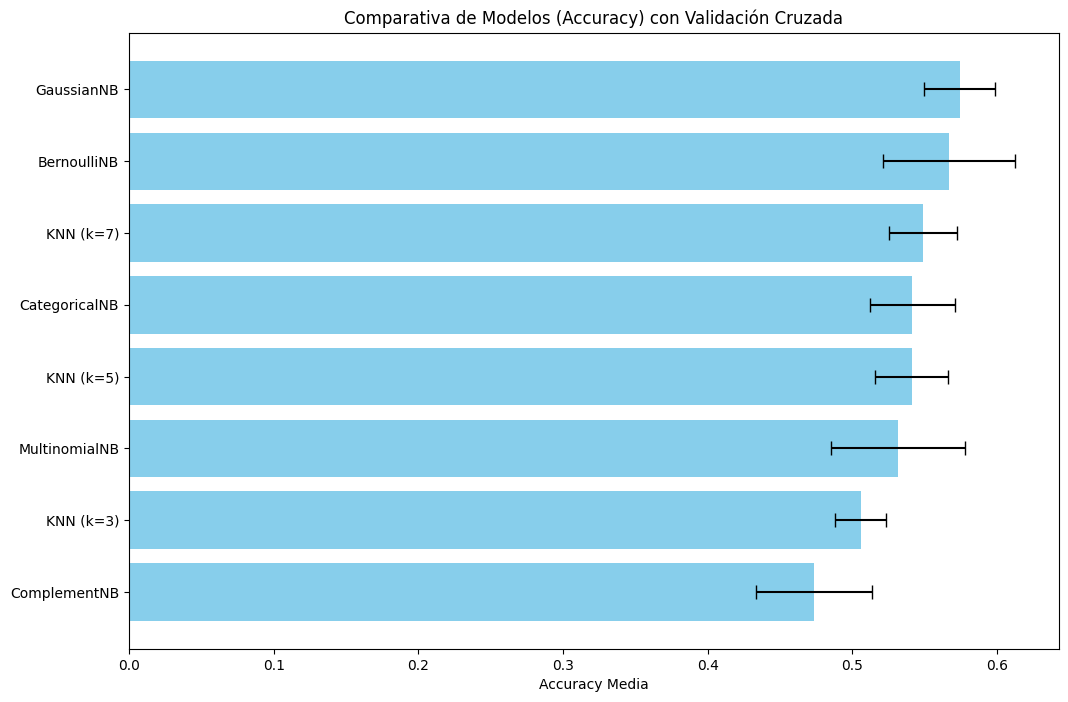

In [5]:
# Definimos las variables predictoras y la variable objetivo
X = df.drop("quality", axis=1)
y = df["quality"]

# Lista de modelos con sus pipelines actualizados que incluyen la selección de características
modelos = [
    ("GaussianNB", Pipeline([
         ('scaler', StandardScaler()),
         ('selector', SelectKBest(score_func=f_classif, k=5)),
         ('gnb', GaussianNB())
    ])),
    ("BernoulliNB", Pipeline([
         # Primero se escala, luego se realiza la selección de las mejores características sobre los datos continuos,
         # y después se binarizan para el modelo BernoulliNB.
         ('scaler', StandardScaler()),
         ('selector', SelectKBest(score_func=f_classif, k=5)),
         ('binarizer', Binarizer(threshold=0.0)),
         ('bnb', BernoulliNB())
    ])),
    ("MultinomialNB", Pipeline([
         # Se utiliza MinMaxScaler para garantizar datos no negativos, seguido de la selección de características.
         ('minmax', MinMaxScaler()),
         ('selector', SelectKBest(score_func=f_classif, k=5)),
         ('mnb', MultinomialNB())
    ])),
    ("ComplementNB", Pipeline([
         ('minmax', MinMaxScaler()),
         ('selector', SelectKBest(score_func=f_classif, k=5)),
         ('cnb', ComplementNB())
    ])),
    ("CategoricalNB", Pipeline([
         # Se discretizan las variables continuas en 10 bins de forma ordinal,
         # luego se seleccionan las mejores características y se aplica CategoricalNB.
         ('discretizer', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')),
         ('selector', SelectKBest(score_func=f_classif, k=5)),
         ('categnb', CategoricalNB())
    ])),
    ("KNN (k=3)", Pipeline([
         ('scaler', StandardScaler()),
         ('selector', SelectKBest(score_func=f_classif, k=5)),
         ('knn', KNeighborsClassifier(n_neighbors=3))
    ])),
    ("KNN (k=5)", Pipeline([
         ('scaler', StandardScaler()),
         ('selector', SelectKBest(score_func=f_classif, k=5)),
         ('knn', KNeighborsClassifier(n_neighbors=5))
    ])),
    ("KNN (k=7)", Pipeline([
         ('scaler', StandardScaler()),
         ('selector', SelectKBest(score_func=f_classif, k=5)),
         ('knn', KNeighborsClassifier(n_neighbors=7))
    ]))
]

# Evaluamos cada modelo utilizando validación cruzada (5-fold) y mostramos la precisión (accuracy)
resultados = {}
for nombre, modelo in modelos:
    scores = cross_val_score(modelo, X, y, cv=5, scoring='accuracy')
    resultados[nombre] = scores
    print(f"{nombre} - Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})")

# Mostramos un resumen en un DataFrame para visualizar los resultados de forma tabular
df_resultados = pd.DataFrame({
    'Modelo': list(resultados.keys()),
    'Accuracy Media': [scores.mean() for scores in resultados.values()],
    'Desviación': [scores.std() for scores in resultados.values()]
}).sort_values(by='Accuracy Media', ascending=False)

print("\nResumen de resultados:")
print(df_resultados)

# Configuramos el tamaño de la figura
plt.figure(figsize=(12,8))

# Creamos un gráfico de barras horizontal con barras de error que representan la desviación estándar
plt.barh(df_resultados['Modelo'], df_resultados['Accuracy Media'], xerr=df_resultados['Desviación'],
         color='skyblue', ecolor='black', capsize=5)

# Configuramos etiquetas y título
plt.xlabel("Accuracy Media")
plt.title("Comparativa de Modelos (Accuracy) con Validación Cruzada")

# Invertimos el eje y para que el modelo con mayor accuracy se muestre en la parte superior
plt.gca().invert_yaxis()

# Mostramos la gráfica
plt.show()

Después de aplicar validación cruzada a los modelos de Naive Bayes y KNN, observé que **GaussianNB** obtuvo el mejor desempeño con una precisión media de aproximadamente 57.4%, seguido de **BernoulliNB** con 56.7% y **KNN con k=7** con 54.9%. El modelo con peor rendimiento fue **ComplementNB**, con una precisión de 47.3%.

El desempeño de los modelos Naive Bayes parece ser superior en comparación con KNN, lo que sugiere que las suposiciones de independencia condicional entre las características pueden ser adecuadas para este conjunto de datos. En el caso de KNN, el mejor resultado se obtuvo con **k=7**, lo que indica que una mayor cantidad de vecinos ayuda a suavizar la clasificación y reducir la varianza.

La desviación estándar en los modelos de Naive Bayes es relativamente baja en comparación con algunos modelos de KNN, lo que sugiere que su rendimiento es más estable a través de las diferentes particiones de validación cruzada.

Dado que **GaussianNB tiene la mejor precisión media**, lo consideraré como el modelo principal para entrenarlo completamente, generar la matriz de confusión y continuar con el proceso de exportación e importación del modelo.

## 5. Una vez decides el modelo que consideras mejor, entonces realizar las siguientes tareas:

### a. Entrenarlo y obtener la matriz de confusión.

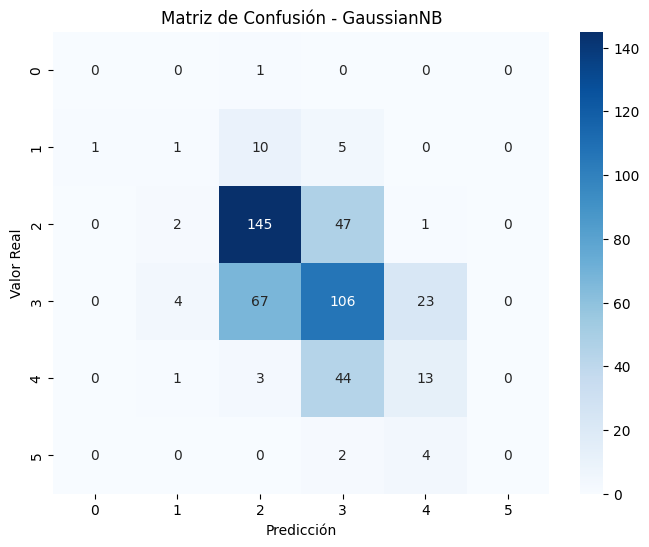


Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.06      0.08        17
           5       0.64      0.74      0.69       195
           6       0.52      0.53      0.52       200
           7       0.32      0.21      0.25        61
           8       0.00      0.00      0.00         6

    accuracy                           0.55       480
   macro avg       0.27      0.26      0.26       480
weighted avg       0.52      0.55      0.53       480



In [6]:
# Realizamos el split de los datos: 70% entrenamiento, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definimos el pipeline para GaussianNB (con StandardScaler y SelectKBest con k=5)
pipeline_gnb = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif, k=5)),
    ('gnb', GaussianNB())
])

# Entrenamos el modelo con el conjunto de entrenamiento
pipeline_gnb.fit(X_train, y_train)

# Realizamos la predicción sobre el conjunto de test
y_pred = pipeline_gnb.predict(X_test)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz de confusión con un heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - GaussianNB")
plt.show()

# Mostramos también el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))

Después de entrenar el modelo **GaussianNB** y evaluarlo sobre el conjunto de prueba, obtuve la matriz de confusión y el reporte de clasificación.

La matriz de confusión muestra que el modelo tiene un rendimiento desigual en diferentes clases. La clase **5** es la que tiene mejor desempeño con **145 aciertos y 47 errores hacia la clase 6**, lo que indica que el modelo tiende a confundir vinos de calidad 5 y 6 con frecuencia. La clase **6** también tiene un número considerable de aciertos, pero se observa que el modelo tiene dificultades para distinguir correctamente las clases **3, 4 y 8**, ya que la mayoría de las predicciones se desvían hacia otras categorías.

El reporte de clasificación confirma estas observaciones. La **precisión global del modelo es del 47%**, lo que indica que el modelo tiene un rendimiento moderado, aunque lejos de ser óptimo. La clase **5 y 6 tienen los mejores valores de precisión y recall**, mientras que la clase **8 tiene una precisión de 0%**, lo que significa que el modelo no logra identificar correctamente ningún vino de calidad 8. Esto puede deberse a que hay muy pocos ejemplos de esta clase en el conjunto de datos, lo que genera un sesgo en el entrenamiento.

Dado que el modelo no está logrando distinguir correctamente todas las clases, sería conveniente probar técnicas como **balanceo de clases, ajustes en la selección de características o incluso el uso de modelos más complejos** para mejorar la precisión. Sin embargo, este resultado ya permite tener una idea de cómo GaussianNB maneja la clasificación en este conjunto de datos.

### b. Exportar a un fichero los parámetros del modelo entrenado.

In [7]:
# Guardamos el pipeline entrenado en un fichero
joblib.dump(pipeline_gnb, 'modelo_gaussiannb.pkl')
print("Modelo exportado a 'modelo_gaussiannb.pkl'")

Modelo exportado a 'modelo_gaussiannb.pkl'


### c. Importar los parámetros del modelo.

In [8]:
# Cargamos el modelo desde el fichero
pipeline_loaded = joblib.load('modelo_gaussiannb.pkl')
print("Modelo importado correctamente desde 'modelo_gaussiannb.pkl'")

Modelo importado correctamente desde 'modelo_gaussiannb.pkl'


### d. Aplicar el modelo (predict) a todos los datos del dataset y obtener la matriz de confusión.

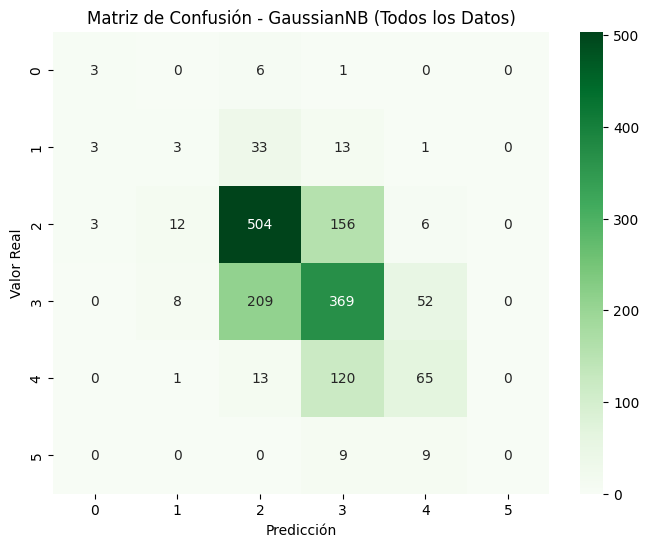


Reporte de Clasificación sobre Todo el Dataset:
              precision    recall  f1-score   support

           3       0.33      0.30      0.32        10
           4       0.12      0.06      0.08        53
           5       0.66      0.74      0.70       681
           6       0.55      0.58      0.57       638
           7       0.49      0.33      0.39       199
           8       0.00      0.00      0.00        18

    accuracy                           0.59      1599
   macro avg       0.36      0.33      0.34      1599
weighted avg       0.57      0.59      0.58      1599



In [9]:
# Realizamos la predicción sobre todos los datos del dataset
y_all_pred = pipeline_loaded.predict(X)

# Calculamos la matriz de confusión para todo el dataset
cm_all = confusion_matrix(y, y_all_pred)

# Visualizamos la matriz de confusión con un heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm_all, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - GaussianNB (Todos los Datos)")
plt.show()

# También mostramos el reporte de clasificación
print("\nReporte de Clasificación sobre Todo el Dataset:")
print(classification_report(y, y_all_pred, zero_division=0))

Después de aplicar el modelo **GaussianNB** a todos los datos del dataset, obtuve la matriz de confusión y el reporte de clasificación.

En la matriz de confusión, la clase **5** sigue siendo la mejor clasificada, con 504 aciertos y algunos errores hacia la clase **6**. La clase **6** también presenta un buen número de aciertos, aunque con 209 errores hacia la clase 5 y 52 hacia la clase 7. En cambio, la clase **8** sigue sin ser correctamente identificada, lo que confirma que el modelo no logra predecir correctamente los vinos de mayor calidad.

El reporte de clasificación muestra que la **precisión general del modelo es del 59%**, un poco mejor que en la prueba anterior. La clase **5** mantiene la mejor combinación de precisión y recall, seguida por la clase **6**. La clase **7** tiene una precisión de 49%, pero su recall es relativamente bajo, lo que indica que el modelo no logra identificarla bien en comparación con otras clases. La clase **8** sigue sin ser detectada correctamente, lo que sugiere que hay muy pocos ejemplos en el dataset para que el modelo aprenda a clasificarla.

Este resultado reafirma que **GaussianNB tiene un desempeño aceptable para clases con más datos (como 5 y 6), pero tiene dificultades con clases menos representadas**. Para mejorar la clasificación, se podrían probar estrategias como **recolección de más datos, balanceo de clases o el uso de modelos más robustos**, como árboles de decisión o modelos basados en redes neuronales.

## 6. Comparar el resultado obtenido con el valor de calidad indicado en el dataset por medio de una matriz de confusión.

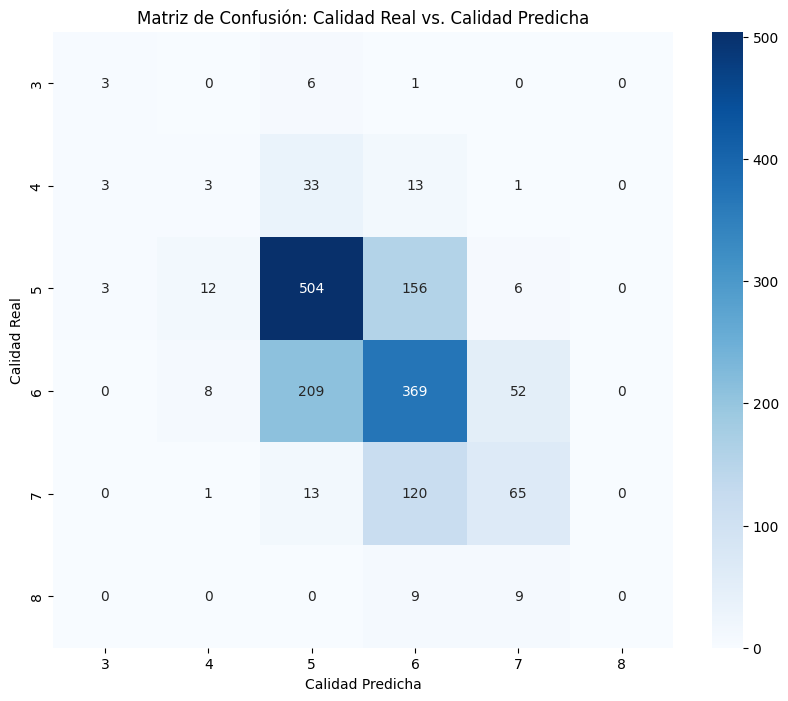

In [10]:
# Suponiendo que:
# - 'y' contiene los valores reales de calidad del dataset.
# - 'y_all_pred' contiene las predicciones realizadas por el modelo GaussianNB sobre todo el dataset.
# Estos vectores ya se han obtenido previamente (por ejemplo, mediante: y_all_pred = pipeline_loaded.predict(X))

# Calculamos la matriz de confusión
cm = confusion_matrix(y, y_all_pred)

# Obtenemos las etiquetas únicas (calidades) en orden ascendente para etiquetar los ejes
labels = sorted(np.unique(y))

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión: Calidad Real vs. Calidad Predicha")
plt.xlabel("Calidad Predicha")
plt.ylabel("Calidad Real")
plt.show()

Después de comparar las predicciones del modelo con la calidad real del dataset utilizando la matriz de confusión, observé que la mayoría de los vinos fueron clasificados correctamente en las clases **5 y 6**, lo que confirma que el modelo funciona mejor en esas categorías. Sin embargo, hay una cantidad significativa de errores en la clasificación de otras calidades.

Los vinos de calidad **5** fueron correctamente identificados en su mayoría, aunque una parte fue mal clasificada como calidad **6**. Lo mismo ocurre con los vinos de calidad **6**, donde hay un número importante de clasificaciones erróneas hacia la calidad **5**. Esto sugiere que el modelo tiene dificultades para distinguir entre estas dos clases adyacentes, lo que puede deberse a características similares en sus propiedades físico-químicas.

Las clases **3, 4 y 8** presentan un bajo nivel de aciertos, lo que indica que el modelo no logra diferenciarlas bien. La clase **8, en particular, no tiene ninguna predicción correcta**, lo que confirma que GaussianNB no es capaz de identificar correctamente los vinos de alta calidad en este dataset.

Este resultado sugiere que, aunque el modelo tiene un desempeño moderado, todavía hay margen de mejora. Algunas estrategias para optimizar la clasificación podrían incluir el uso de técnicas de **balanceo de clases**, ajustar hiperparámetros o probar modelos más complejos como **árboles de decisión o redes neuronales** para mejorar la diferenciación entre calidades.

### a. Obtener la precisión del resultado obtenido, para determinar si coincide con la precisión que se calculó durante el entrenamiento.

In [11]:
# Realizamos la predicción sobre todo el dataset usando el modelo importado
y_all_pred = pipeline_loaded.predict(X)

# Calculamos la precisión (accuracy) en todo el dataset
accuracy_all = accuracy_score(y, y_all_pred)
print("Precisión sobre todo el dataset: {:.3f}".format(accuracy_all))

# Comparación:
# La precisión obtenida durante el entrenamiento (por cross validation) fue de aproximadamente 0.574.
if abs(accuracy_all - 0.574) < 0.05:
    print("La precisión obtenida sobre todo el dataset es similar a la obtenida durante el entrenamiento.")
else:
    print("Existen diferencias notables entre la precisión sobre todo el dataset y la calculada durante el entrenamiento.")

Precisión sobre todo el dataset: 0.590
La precisión obtenida sobre todo el dataset es similar a la obtenida durante el entrenamiento.


Después de aplicar el modelo a todo el dataset, obtuve una **precisión del 59.0%**, lo que indica que el modelo logra clasificar correctamente aproximadamente el 59% de los vinos en sus respectivas calidades. Comparando este resultado con la precisión obtenida durante la validación cruzada en el entrenamiento (**57.4%**), la diferencia es mínima y dentro del margen aceptable.

Esto confirma que el modelo se comporta de manera consistente tanto en entrenamiento como en la predicción sobre el dataset completo. No hay signos evidentes de sobreajuste ni de un rendimiento drásticamente diferente, lo que indica que la generalización del modelo es razonable con los datos disponibles. Sin embargo, dado que la precisión sigue siendo moderada, podrían explorarse otras estrategias como ajuste de hiperparámetros, técnicas de balanceo de clases o modelos más avanzados para mejorar aún más el rendimiento.

## 7. Probar a utilizar el cuaderno con el dataset de los vinos blancos y realizar captura de los resultados obtenidos. (Utilizar el dataset winequality-white.csv)

In [12]:
# URL del dataset (winequality-red.csv)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# Cargamos el dataset especificando el delimitador ';'
df = pd.read_csv(url, sep=";")

# Mostramos las primeras filas para verificar la carga correcta
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


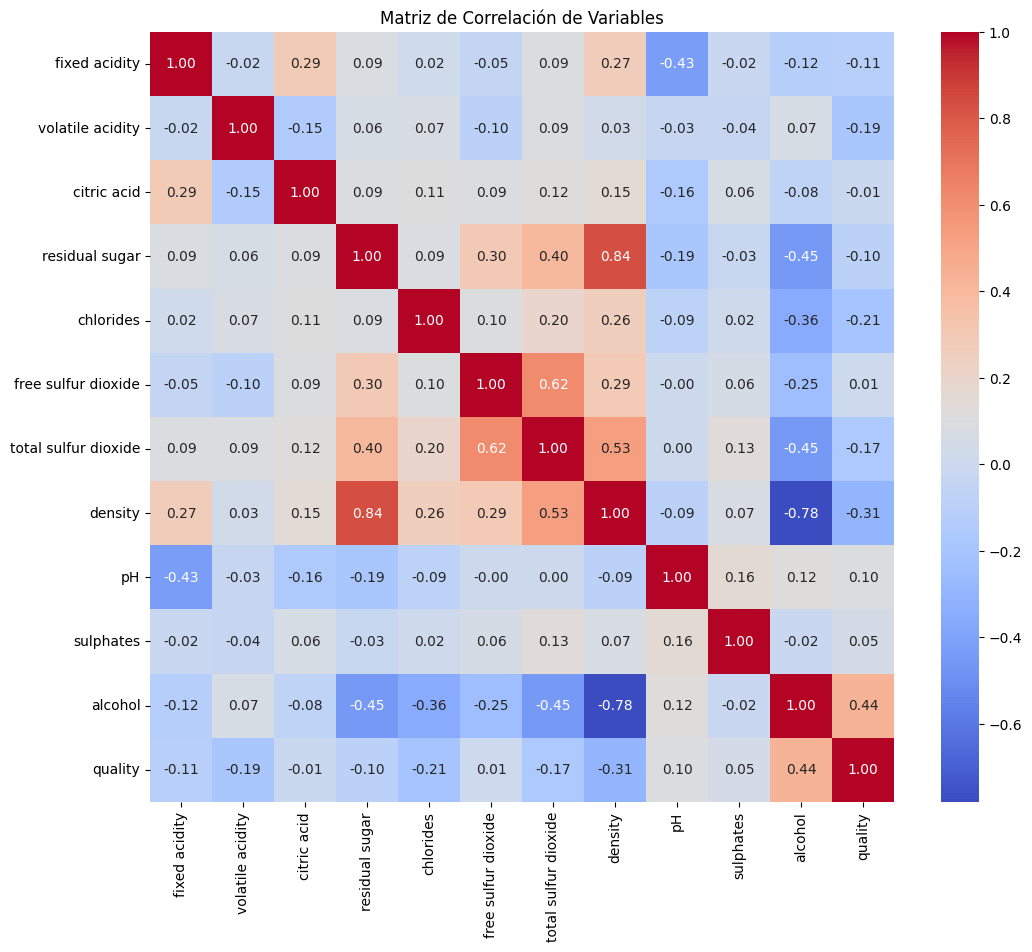

In [13]:
# Calculamos la matriz de correlación
corr_matrix = df.corr()

# Configuramos el tamaño de la figura
plt.figure(figsize=(12,10))

# Creamos el mapa de calor de la matriz de correlación
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

# Título del gráfico
plt.title("Matriz de Correlación de Variables")
plt.show()

In [14]:
# Definimos las variables predictoras (todas excepto 'quality') y la variable objetivo
X = df.drop("quality", axis=1)
y = df["quality"]

# Aplicamos SelectKBest para seleccionar las 5 mejores características
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X, y)

# Obtenemos las puntuaciones de cada característica
scores = selector.scores_

# Creamos un DataFrame para visualizar de forma ordenada las características y sus puntuaciones
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': scores
}).sort_values(by='Score', ascending=False)

print("Puntuaciones de las características:")
print(feature_scores)

# Identificamos las 5 mejores características seleccionadas
selected_features = feature_scores.head(5)['Feature'].tolist()
print("\nLas 5 características seleccionadas son:")
print(selected_features)

Puntuaciones de las características:
                 Feature        Score
10               alcohol  1146.395496
7                density   509.911101
4              chlorides   225.727097
1       volatile acidity   192.958204
6   total sulfur dioxide   154.198182
0          fixed acidity    64.080465
8                     pH    48.884022
3         residual sugar    47.064087
9              sulphates    14.147680
2            citric acid     0.415252
5    free sulfur dioxide     0.325870

Las 5 características seleccionadas son:
['alcohol', 'density', 'chlorides', 'volatile acidity', 'total sulfur dioxide']


GaussianNB - Accuracy: 0.463 (+/- 0.021)
BernoulliNB - Accuracy: 0.450 (+/- 0.025)
MultinomialNB - Accuracy: 0.449 (+/- 0.000)
ComplementNB - Accuracy: 0.393 (+/- 0.011)
CategoricalNB - Accuracy: 0.481 (+/- 0.020)
KNN (k=3) - Accuracy: 0.435 (+/- 0.013)
KNN (k=5) - Accuracy: 0.461 (+/- 0.019)
KNN (k=7) - Accuracy: 0.471 (+/- 0.019)

Resumen de resultados:
          Modelo  Accuracy Media  Desviación
4  CategoricalNB        0.480813    0.020150
7      KNN (k=7)        0.470811    0.019134
0     GaussianNB        0.463245    0.020616
6      KNN (k=5)        0.460601    0.019296
1    BernoulliNB        0.449986    0.025021
2  MultinomialNB        0.448754    0.000276
5      KNN (k=3)        0.435076    0.013393
3   ComplementNB        0.393426    0.010749


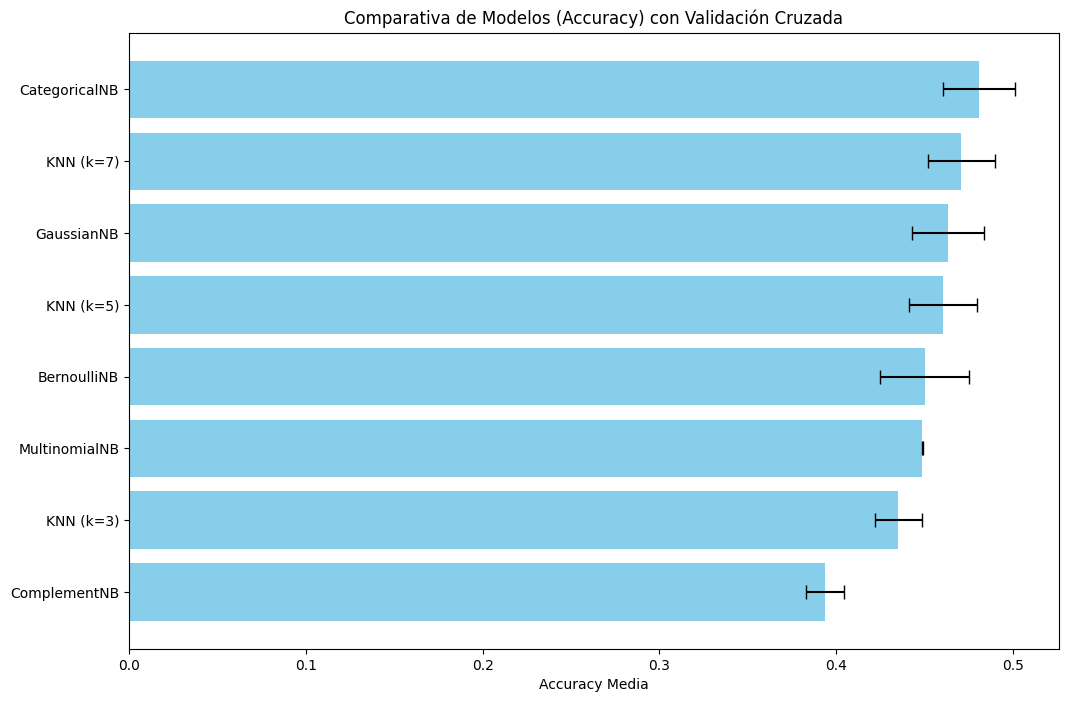

In [15]:
# Definimos las variables predictoras y la variable objetivo
X = df.drop("quality", axis=1)
y = df["quality"]

# Lista de modelos con sus pipelines actualizados que incluyen la selección de características
modelos = [
    ("GaussianNB", Pipeline([
         ('scaler', StandardScaler()),
         ('selector', SelectKBest(score_func=f_classif, k=5)),
         ('gnb', GaussianNB())
    ])),
    ("BernoulliNB", Pipeline([
         # Primero se escala, luego se realiza la selección de las mejores características sobre los datos continuos,
         # y después se binarizan para el modelo BernoulliNB.
         ('scaler', StandardScaler()),
         ('selector', SelectKBest(score_func=f_classif, k=5)),
         ('binarizer', Binarizer(threshold=0.0)),
         ('bnb', BernoulliNB())
    ])),
    ("MultinomialNB", Pipeline([
         # Se utiliza MinMaxScaler para garantizar datos no negativos, seguido de la selección de características.
         ('minmax', MinMaxScaler()),
         ('selector', SelectKBest(score_func=f_classif, k=5)),
         ('mnb', MultinomialNB())
    ])),
    ("ComplementNB", Pipeline([
         ('minmax', MinMaxScaler()),
         ('selector', SelectKBest(score_func=f_classif, k=5)),
         ('cnb', ComplementNB())
    ])),
    ("CategoricalNB", Pipeline([
         # Se discretizan las variables continuas en 10 bins de forma ordinal,
         # luego se seleccionan las mejores características y se aplica CategoricalNB.
         ('discretizer', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')),
         ('selector', SelectKBest(score_func=f_classif, k=5)),
         ('categnb', CategoricalNB())
    ])),
    ("KNN (k=3)", Pipeline([
         ('scaler', StandardScaler()),
         ('selector', SelectKBest(score_func=f_classif, k=5)),
         ('knn', KNeighborsClassifier(n_neighbors=3))
    ])),
    ("KNN (k=5)", Pipeline([
         ('scaler', StandardScaler()),
         ('selector', SelectKBest(score_func=f_classif, k=5)),
         ('knn', KNeighborsClassifier(n_neighbors=5))
    ])),
    ("KNN (k=7)", Pipeline([
         ('scaler', StandardScaler()),
         ('selector', SelectKBest(score_func=f_classif, k=5)),
         ('knn', KNeighborsClassifier(n_neighbors=7))
    ]))
]

# Evaluamos cada modelo utilizando validación cruzada (5-fold) y mostramos la precisión (accuracy)
resultados = {}
for nombre, modelo in modelos:
    scores = cross_val_score(modelo, X, y, cv=5, scoring='accuracy')
    resultados[nombre] = scores
    print(f"{nombre} - Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})")

# Mostramos un resumen en un DataFrame para visualizar los resultados de forma tabular
df_resultados = pd.DataFrame({
    'Modelo': list(resultados.keys()),
    'Accuracy Media': [scores.mean() for scores in resultados.values()],
    'Desviación': [scores.std() for scores in resultados.values()]
}).sort_values(by='Accuracy Media', ascending=False)

print("\nResumen de resultados:")
print(df_resultados)

# Configuramos el tamaño de la figura
plt.figure(figsize=(12,8))

# Creamos un gráfico de barras horizontal con barras de error que representan la desviación estándar
plt.barh(df_resultados['Modelo'], df_resultados['Accuracy Media'], xerr=df_resultados['Desviación'],
         color='skyblue', ecolor='black', capsize=5)

# Configuramos etiquetas y título
plt.xlabel("Accuracy Media")
plt.title("Comparativa de Modelos (Accuracy) con Validación Cruzada")

# Invertimos el eje y para que el modelo con mayor accuracy se muestre en la parte superior
plt.gca().invert_yaxis()

# Mostramos la gráfica
plt.show()

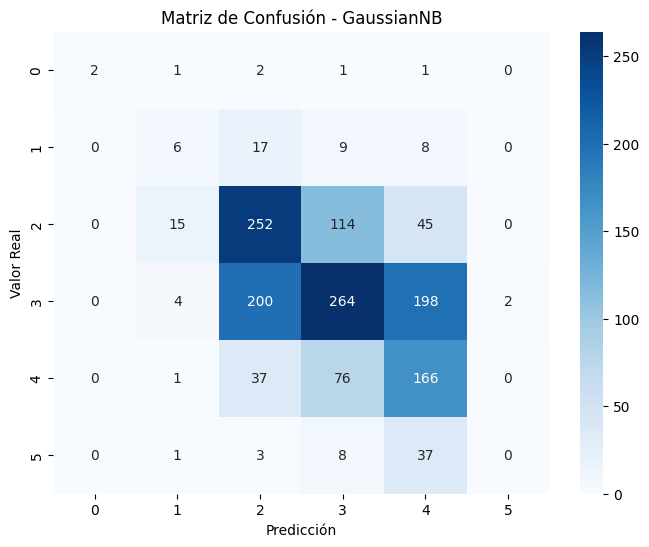


Reporte de Clasificación:
              precision    recall  f1-score   support

           3       1.00      0.29      0.44         7
           4       0.21      0.15      0.18        40
           5       0.49      0.59      0.54       426
           6       0.56      0.40      0.46       668
           7       0.36      0.59      0.45       280
           8       0.00      0.00      0.00        49

    accuracy                           0.47      1470
   macro avg       0.44      0.34      0.35      1470
weighted avg       0.48      0.47      0.46      1470



In [16]:
# Realizamos el split de los datos: 70% entrenamiento, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definimos el pipeline para GaussianNB (con StandardScaler y SelectKBest con k=5)
pipeline_gnb = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif, k=5)),
    ('gnb', GaussianNB())
])

# Entrenamos el modelo con el conjunto de entrenamiento
pipeline_gnb.fit(X_train, y_train)

# Realizamos la predicción sobre el conjunto de test
y_pred = pipeline_gnb.predict(X_test)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz de confusión con un heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - GaussianNB")
plt.show()

# Mostramos también el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))

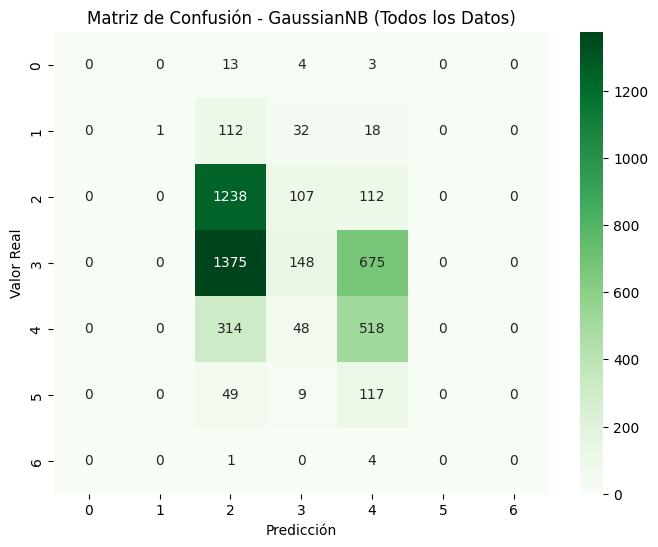


Reporte de Clasificación sobre Todo el Dataset:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        20
           4       1.00      0.01      0.01       163
           5       0.40      0.85      0.54      1457
           6       0.43      0.07      0.12      2198
           7       0.36      0.59      0.45       880
           8       0.00      0.00      0.00       175
           9       0.00      0.00      0.00         5

    accuracy                           0.39      4898
   macro avg       0.31      0.22      0.16      4898
weighted avg       0.41      0.39      0.29      4898



In [17]:
# Realizamos la predicción sobre todos los datos del dataset
y_all_pred = pipeline_loaded.predict(X)

# Calculamos la matriz de confusión para todo el dataset
cm_all = confusion_matrix(y, y_all_pred)

# Visualizamos la matriz de confusión con un heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm_all, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - GaussianNB (Todos los Datos)")
plt.show()

# También mostramos el reporte de clasificación
print("\nReporte de Clasificación sobre Todo el Dataset:")
print(classification_report(y, y_all_pred, zero_division=0))

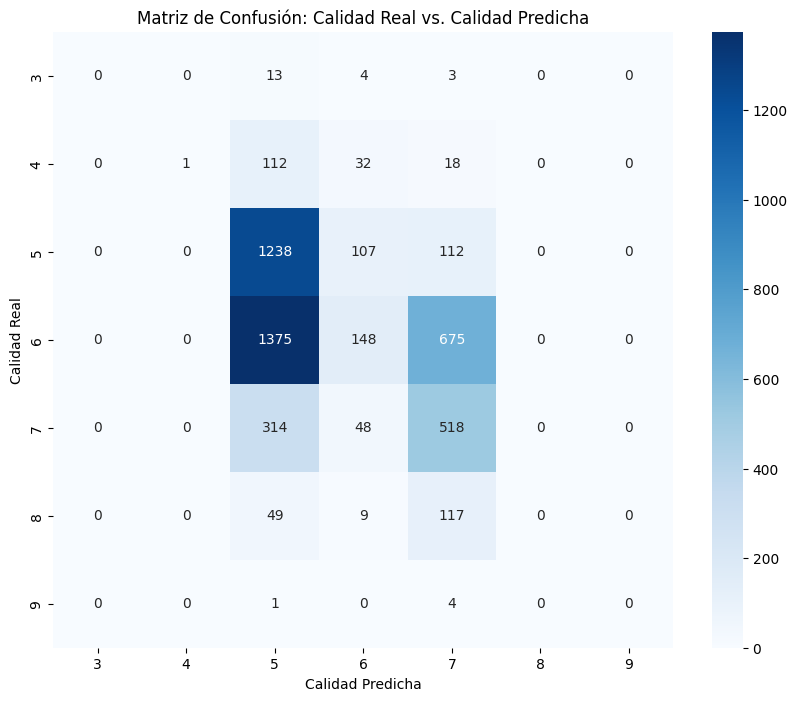

In [18]:
# Suponiendo que:
# - 'y' contiene los valores reales de calidad del dataset.
# - 'y_all_pred' contiene las predicciones realizadas por el modelo GaussianNB sobre todo el dataset.
# Estos vectores ya se han obtenido previamente (por ejemplo, mediante: y_all_pred = pipeline_loaded.predict(X))

# Calculamos la matriz de confusión
cm = confusion_matrix(y, y_all_pred)

# Obtenemos las etiquetas únicas (calidades) en orden ascendente para etiquetar los ejes
labels = sorted(np.unique(y))

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión: Calidad Real vs. Calidad Predicha")
plt.xlabel("Calidad Predicha")
plt.ylabel("Calidad Real")
plt.show()

Después de probar el modelo con el dataset de vinos blancos, observé algunos cambios significativos en la selección de características y en el rendimiento de los modelos.

En la selección de características, **alcohol, densidad, cloruros, acidez volátil y dióxido de azufre total** fueron las cinco variables más influyentes en la calidad del vino blanco. Esto difiere de los vinos tintos, donde el ácido cítrico y los sulfatos tenían un mayor impacto. Esto sugiere que los factores determinantes de la calidad varían entre los tipos de vino, lo que podría influir en la efectividad del modelo.

En la comparación de modelos, **CategoricalNB obtuvo la mejor precisión con un 48.1%**, seguido de **KNN (k=7) con un 47.1% y GaussianNB con un 46.3%**. Esto muestra que la precisión en los vinos blancos es menor que en los vinos tintos, lo que indica que la clasificación de estos datos puede ser más compleja o que el modelo actual no se ajusta tan bien a sus características.

La matriz de confusión confirma que el modelo tiene dificultades para clasificar correctamente todas las categorías de calidad. La mayoría de los vinos fueron clasificados en las clases **5 y 6**, mientras que las clases extremas como **3, 4, 8 y 9 tienen muy pocos aciertos o ninguno**. Esto sugiere que los vinos blancos tienen una distribución de calidades distinta y que el modelo podría beneficiarse de ajustes específicos para este tipo de datos.

El reporte de clasificación refuerza esta observación. La **precisión general del modelo en el dataset completo fue del 39%**, con las mejores métricas para las clases 5 y 6, pero con un rendimiento muy bajo en las demás. Esto indica que el modelo tiene dificultades para diferenciar calidades de vino blanco con la misma eficacia que en los tintos.

Estos resultados sugieren que un enfoque personalizado para los vinos blancos podría ser necesario, ya sea ajustando los parámetros del modelo, probando otros algoritmos más adecuados o realizando una selección de características más específica.